In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn import linear_model, metrics, naive_bayes, svm, neural_network, ensemble, neighbors



import pickle

In [2]:
X_train = pd.read_csv('new data/X_trainFNC.csv').squeeze()
X_test = pd.read_csv('new data/X_testFNC.csv').squeeze()
X_valid = pd.read_csv('new data/X_validFNC.csv').squeeze()
y_train = pd.read_csv('new data/y_trainFNC.csv').squeeze()
y_test = pd.read_csv('new data/y_testFNC.csv').squeeze()
y_valid = pd.read_csv('new data/y_validFNC.csv').squeeze()

In [3]:
X_liar = pd.read_csv('data/X_liar.csv').squeeze()
y_liar = pd.read_csv('data/y_liar.csv').squeeze()

In [16]:
X_wikinews = pd.read_csv('data/X_wikinews.csv').squeeze()
y_wikinews = pd.read_csv('data/y_wikinews.csv').squeeze()

In [5]:
vectorizer = TfidfVectorizer(       
    lowercase=False, 
    ngram_range=(1,1), 
    token_pattern=r"(?u)\b\w\w+\b|<DATE>|<NUM>|<EMAIL>|<URL>",
    min_df=3
)

In [6]:
vectorizer.fit(X_train)

len(vectorizer.get_feature_names())

94077

In [12]:
n_train = X_train.shape[0]
n_val = X_valid.shape[0]

X_trainval = np.concatenate((X_train, X_valid))
y_trainval = np.concatenate((y_train, y_valid))

test_fold = -1*np.ones(X_trainval.shape[0])
test_fold[n_train:] = 0
pds = PredefinedSplit(test_fold)

TFIDF_Xtrainval = vectorizer.transform(X_trainval)

TFIDF_Xtrain = vectorizer.transform(X_train)
TFIDF_Xvalid = vectorizer.transform(X_valid)
TFIDF_Xtest = vectorizer.transform(X_test)

In [8]:
TFIDF_Xliar = vectorizer.transform(X_liar)

In [17]:
TFIDF_Xwikinews = vectorizer.transform(X_wikinews)

In [27]:
LR_base = pickle.load(open('new models/LR_base.sav', 'rb')) # 1 min
LR_tuned = pickle.load(open('new models/LR_tuned.sav', 'rb')) # fast
NB_base = pickle.load(open('new models/NB_base.sav', 'rb')) # fast
NB_tuned = pickle.load(open('new models/NB_tuned.sav', 'rb')) # fast
RF_base = pickle.load(open('new models/RF_base.sav', 'rb')) # 10 mins
RF_tuned = pickle.load(open('new models/RF_tuned.sav', 'rb')) # 20 mins
KNN_base = pickle.load(open('new models/KNN_base.sav', 'rb')) # 4 sec
KNN_tuned = pickle.load(open('new models/KNN_base.sav', 'rb'))
#SVM_base = pickle.load(open('SVM_base.sav', 'rb'))
#SVM_tuned = pickle.load(open('SVM_tuned.sav', 'rb'))
#ANN_base = pickle.load(open('ANN_base.sav', 'rb'))
AMM_tuned = pickle.load(open('new models/ANN_tuned.sav', 'rb'))

c:\Users\Theo\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ANN_tuned.sav'

In [26]:
print(f'Base Accuracry: {LR_base.score(TFIDF_Xtrain, y_train):.3f}')
print(f'Tuned Accuracy: {LR_tuned.score(TFIDF_Xtrain, y_train):.3f}')

Base Accuracry: 0.880
Tuned Accuracy: 0.882


In [19]:
print(f'Base Accuracry: {LR_base.score(TFIDF_Xtest, y_test):.3f}')
print(f'Tuned Accuracy: {LR_tuned.score(TFIDF_Xtest, y_test):.3f}')
print(f'LIAR Accuracy: {LR_tuned.score(TFIDF_Xliar, y_liar):.3f}')
print(f'WN Accuracy: {LR_tuned.score(TFIDF_Xwikinews, y_wikinews):.3f}')

Base Accuracry: 0.838
Tuned Accuracy: 0.851
LIAR Accuracy: 0.644
WN Accuracy: 0.699


In [12]:
LRbase_pp = LR_base.predict_proba(TFIDF_Xtest)[::,1]
LRtuned_pp = LR_tuned.predict_proba(TFIDF_Xtest)[::,1]

LRbase_fpr, LRbase_tpr, _ = metrics.roc_curve(y_test, LRbase_pp)
LRtuned_fpr, LRtuned_tpr, _ = metrics.roc_curve(y_test, LRtuned_pp)

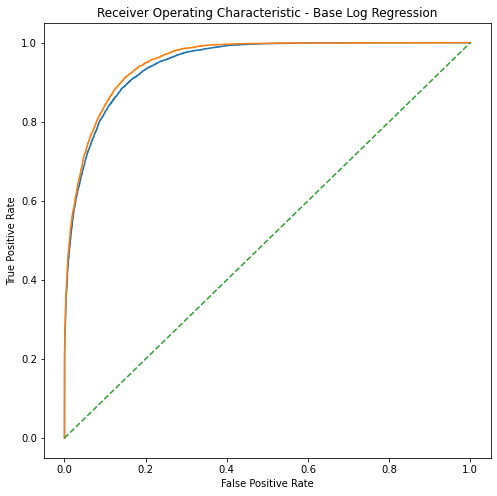

In [13]:
plt.subplots(1, figsize=(8,8))

plt.title('Receiver Operating Characteristic - Base Log Regression')
plt.plot(LRbase_fpr, LRbase_tpr)
plt.plot(LRtuned_fpr, LRtuned_tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
print(f'Base Accuracry: {NB_base.score(TFIDF_Xtrain, y_train):.3f}')
print(f'Tuned Accuracy: {NB_tuned.score(TFIDF_Xtrain, y_train):.3f}')

Base Accuracry: 0.809
Tuned Accuracy: 0.840


In [20]:
print(f'Base Accuracry: {NB_base.score(TFIDF_Xtest, y_test):.3f}')
print(f'Tuned Accuracy: {NB_tuned.score(TFIDF_Xtest, y_test):.3f}')
print(f'LIAR Accuracy: {NB_tuned.score(TFIDF_Xliar, y_liar):.3f}')
print(f'WN Accuracy: {NB_tuned.score(TFIDF_Xwikinews, y_wikinews):.3f}')

Base Accuracry: 0.785
Tuned Accuracy: 0.787
LIAR Accuracy: 0.613
WN Accuracy: 0.421


In [15]:
NBbase_pp = NB_base.predict_proba(TFIDF_Xtest)[::,1]
NBtuned_pp = NB_tuned.predict_proba(TFIDF_Xtest)[::,1]

NBbase_fpr, NBbase_tpr, _ = metrics.roc_curve(y_test, NBbase_pp)
NBtuned_fpr, NBtuned_tpr, _ = metrics.roc_curve(y_test, NBtuned_pp)

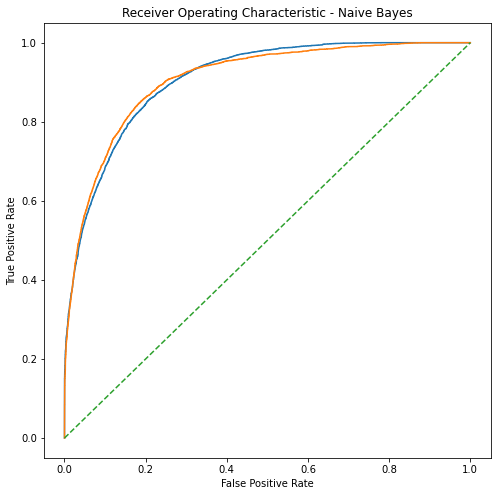

In [16]:
plt.subplots(1, figsize=(8,8))

plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(NBbase_fpr, NBbase_tpr)
plt.plot(NBtuned_fpr, NBtuned_tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print (f'Base Accuracry: {SVM_base.score(TFIDF_Xtest, y_test):.3f}\nTuned Accuracy: {SVM_tuned.score(TFIDF_Xtest, y_test):.3f}')

In [ ]:
SVMbase_pp = SVM_base.predict_proba(TFIDF_Xtest)[::,1]
SVMtuned_pp = SVM_tuned.predict_proba(TFIDF_Xtest)[::,1]

SVMbase_fpr, SVMbase_tpr, _ = metrics.roc_curve(y_test, SVMbase_pp)
SVMtuned_fpr, SVMtuned_tpr, _ = metrics.roc_curve(y_test, SVMtuned_pp)

In [ ]:
plt.subplots(1, figsize=(8,8))

plt.title('Receiver Operating Characteristic - Base Log Regression')
plt.plot(SVMbase_fpr, SVMbase_tpr)
plt.plot(SVMtuned_fpr, SVMtuned_tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print (f'Base Accuracry: {ANN_base.score(TFIDF_Xtest, y_test):.3f}\nTuned Accuracy: {ANN_tuned.score(TFIDF_Xtest, y_test):.3f}')

In [24]:
ANNbase_pp = ANN_base.predict_proba(TFIDF_Xtest)[::,1]
ANNtuned_pp = ANN_tuned.predict_proba(TFIDF_Xtest)[::,1]

ANNbase_fpr, ANNbase_tpr, _ = metrics.roc_curve(y_test, ANNbase_pp)
ANNtuned_fpr, ANNtuned_tpr, _ = metrics.roc_curve(y_test, ANNtuned_pp)

NameError: name 'ANN_base' is not defined

In [ ]:
plt.subplots(1, figsize=(8,8))

plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(ANNbase_fpr, ANNbase_tpr)
plt.plot(ANNtuned_fpr, ANNtuned_tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
print(f'Base Accuracry: {RF_base.score(TFIDF_Xtrain, y_train):.3f}')
print(f'Tuned Accuracy: {RF_tuned.score(TFIDF_Xtrain, y_train):.3f}')

Base Accuracry: 1.000
Tuned Accuracy: 1.000


In [21]:
print(f'Base Accuracry: {RF_base.score(TFIDF_Xtest, y_test):.3f}')
print(f'Tuned Accuracy: {RF_tuned.score(TFIDF_Xtest, y_test):.3f}')
print(f'LIAR Accuracy: {RF_tuned.score(TFIDF_Xliar, y_liar):.3f}')
print(f'WN Accuracy: {RF_tuned.score(TFIDF_Xwikinews, y_wikinews):.3f}')

Base Accuracry: 0.816
Tuned Accuracy: 0.818
LIAR Accuracy: 0.702
WN Accuracy: 0.730


In [22]:
print(f'Base Accuracry: {KNN_base.score(TFIDF_Xtest, y_test):.3f}')
print(f'Tuned Accuracy: {KNN_tuned.score(TFIDF_Xtest, y_test):.3f}')
print(f'LIAR Accuracy: {KNN_tuned.score(TFIDF_Xliar, y_liar):.3f}')
print(f'WN Accuracy: {KNN_tuned.score(TFIDF_Xwikinews, y_wikinews):.3f}')

Base Accuracry: 0.737
Tuned Accuracy: 0.737
LIAR Accuracy: 0.553
WN Accuracy: 0.451
